### Udemy Hadelin & Kerill

<b>[1. Data Preprocessing ](#1)<br></b>
    1.1 Importing the Data<br>
    1.2 Missing Data<br>
    1.3 Encoding Categorical Data<br>
    1.4 Splitting the dataset into the Training set and Test set <br>
    1.5 Feature Scaling <br>   
    
<b>[2. Simple Linear Regression ](#2)<br></b>
    
<b>[3. Multiple Linear Regression](#3)<br></b>
    
<b>[4. Polynomial Linear Regression](#4)<br></b>

<b>[5. Support Vector Regression](#5)<br></b>

<b>[6. Decision Tree Regression](#6)<br></b>

<b>[7. Random Forest Regression](#7)<br></b>

<b>[8. Regularization Based Models](#8)<br></b>
    8.1 Ridge Regression<br>
    8.2 Lasso Regression<br>
    8.3 Elastic Net Regression<br>
    
<b>[9. Stochastic Gradient Descent](#9)</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## <a id=1> 1. Data Preprocessing </a>

#### 1.1 Importing the Data

In [15]:
# a) Importing the dataset:
dataset = pd.read_csv("Data.csv")

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

#### 1.2 Missing Data

In [16]:
# a) Delete them (Before creating X and y)
dataset.dropna(axis=0,inplace=True)

# b) Replace the missing data with the mean of all data
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

# 2. Connect the "imputer" object to the "matrix of features" through the "fit" method
# the argument of the fit method has to be an array of numerical values
imputer.fit(X[:,1:3])
# 3. Call the "transform method" to replace the nan values
X[:,1:3] = imputer.transform(X[:,1:3])

#### 1.3 Encoding Categorical Data

In [17]:
# a) Encoding the natrix of features

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
# ct will not give us a numpy array which is necesasry for the future machine learning models we're going to build
X = np.array(ct.fit_transform(X))
#X = ct.fit_transform(X)

# b) Encoding the target vector

le = LabelEncoder()
y = le.fit_transform(y)

#### 1.4 Splitting the dataset into the Training set and Test set 

In [18]:
# Recommended split: training set = 80% of observations, test set = 20% of observations
# we precise the random_split = 1 just to get the same split as the Udemy instructor with smexy French accent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# The line above basically randomly takes 80% of the observations and puts them in the training set and 20% in th test set

#### 1.5 Feature Scaling 
(Has to be applied after the Splitting!)

Lets all features have the same scale
Applied in some machine learning models to avoid some features being dominated by other features.

There are 2 feature scaling techniques:

a) Standardisation:  xstand = ( x - mean(x) ) / std(x)  
-3 < xstand < 3
<br /> works all the time (recommended)

b) Normalisation:  xnorm = ( x - min(x) ) / ( max(x) - min(x) )
<br /> 0 < xstand < 1
<br /> recommended where the features have  a normal distribution


In [19]:
# we fit the feature scaling on X_train only because X_test is data that we're not supposed to have
# but we transform both X_train and X_test
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:,3:] = sc.transform(X_test[:,3:])

C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## <a id=2> 2. Simple Linear Regression

In [28]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
# 1) The linear regression model we will build will be an instance/object of the LinearRegression class
# regression is when we have to predict a continuous real value like salary, classification is when we have to predict a category/class
regressor = LinearRegression()
# 2) Training the created model (fitting)
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Salary')

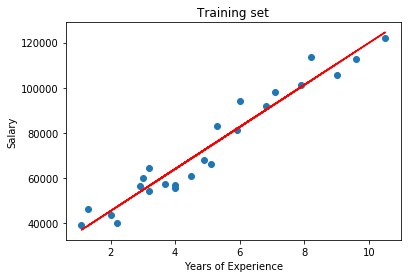

In [41]:
# a) Training set results
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('Training set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

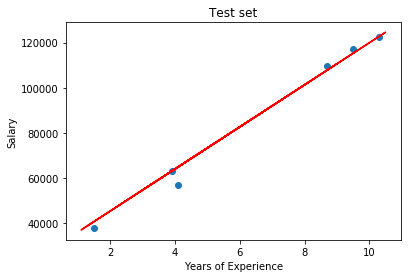

In [42]:
# b) Test set results
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color='red')
# or: plt.plot(X_test,y_predict)  (same regression line cuz based on same model)
plt.title('Test set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [44]:
# Bonus:
# a) Predicting the salary of 1 employee with 12 yrs of experience
print(regressor.predict([[12]]))

# b) Getting the final linear regression equation:
# We call 2 attributes of our regressor object:
print(regressor.coef_)
print(regressor.intercept_)

[138531.00067138]
[9312.57512673]
26780.099150628186


## <a id=3>3. Multiple Linear Regression

<b> A. Without Backward Elimination (sklearn does it for you)

In [25]:
# 1) Importing the Dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# 2) Encoding Catefgorical Data
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

# 3) Splitting the DataSet
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# 4) Feature Scaling ? In multiple linear regression there is absolutely no need to apply feature scaling
# because the linear regression equation's coefficients will compensate for how big/small the variable is

# 5) Training the Multiple Linear Regression Model on the training set
# QUESTION 1: Do we have to remove one of the dummy variables to avoid the dummy variable trap
# ANSWER: No, because the class we are going to use deals with it by itself

# QUESTION 2: Do we have to work on features to select the ones with the highest p values through methods such as backwards elimination
# ANSWER: No, because the class we are going to use deals with it by itself

# The class we will use is exactly the same as the simple linear regression
# it will recognize that we have several features and automatocally do the multiple linear regression.

regressor = LinearRegression()
regressor.fit(X_train,y_train)

# 6) Predicting the Test set results
y_pred = regressor.predict(X_test)

# 7) Visualizing the real and predicted test set
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_pred),1)),axis=1))

[[111337.43 105733.54]
 [186731.85 191792.06]
 [ 98078.19  97427.84]
 [ 88299.49  89949.14]
 [100834.84 107404.34]
 [ 82320.08  81005.76]
 [ 73183.8   78239.91]
 [125700.45 134307.35]
 [ 97939.97  97483.56]
 [ 75475.28  77798.83]]


<b> B. With Backward Elimination 

In [37]:
import statsmodels.formula.api as sm

In [50]:
# 1) Importing the Dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# 2) Encoding Catefgorical Data
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
# 1) Importing the Dataset: done above
# 2) Encoding Catefgorical Data: done above

# 3) Avoiding the dummy variable trap:
X = X[:,1:]

# 4) Building the optimal model using backward elimination:

# The statsmodel doesn't take into account the b0 constant so we need to add the vector X=(1,1,...,1) to our matrix of features
# sm.OLS() exog= X parameter says that: an intercept (b0) is not included by default and should be added by the user.
X = np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)

# Initialize the optimal matrix of features which will only contain the statistically significant features
X_opt = X[:,[0,1,2,3,4,5]].astype(float)

# step1: Select a significance level to stay in the model alpha or SL = 0.05

# step2: Fit the model with all possible predictors (features)
# Create a new regressor which is an object from the OLS (ordinarily squared) class
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()

# step3: Consider the predictor with the highest P-value, if P > SL, go to step4 otherwise Finish
regressor_OLS.summary()
# x2 had the biggest P value and it's > SL

# step4: Remove the predictor
X_opt = X[:,[0,1,3,4,5]].astype(float)

# step5: Fit the model without this feature
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()
# x1 had the biggest P value and it's > SL
X_opt = X[:,[0,3,4,5]].astype(float)
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()
# x2 had the biggest P value and it's > SL
X_opt = X[:,[0,3,5]].astype(float)
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()
# x2 had the biggest P value and it's > SL
X_opt = X[:,[0,3]].astype(float)
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 15 May 2020   Prob (F-statistic):           3.50e-32
Time:                        02:25:38   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## <a id=4> 4. Polynomial Linear Regression </a>

- Ex of use: the spread of pandemics.
- It's still called linear regression (even though x1 variable is polinomial) cuz the unknowns in linear regression are the cofficients b1, b2,... and those are still linear.
- It's a special case of multiple linear regression.

Text(0.5, 1.0, 'Polynomial Regression')

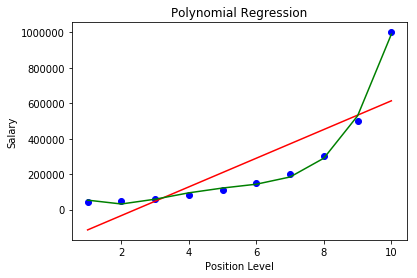

In [40]:
# 1) Data preprocessing:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
# X = dataset.iloc[:,1].values gives a vector so we get an error when fitting the model
y = dataset.iloc[:,-1].values

# No Splitting (very few data so no splitting)

# 2) Training the linear regression model on the whole dataset
lin_reg1 = LinearRegression()
lin_reg1.fit(X,y)

# 3) Training the polinomial linear regression model on the whole dataset
   # a) create the matrix of powered features
poly_features = PolynomialFeatures(degree=4)
X_poly =  poly_features.fit_transform(X)

   # b) linear regression model with the poly matrix
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

# 4) visualizing the models
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg1.predict(X),color='red')
plt.plot(X,lin_reg2.predict(X_poly),color='green')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression')

Text(0.5, 1.0, 'Polynomial Regression (High Resolution)')

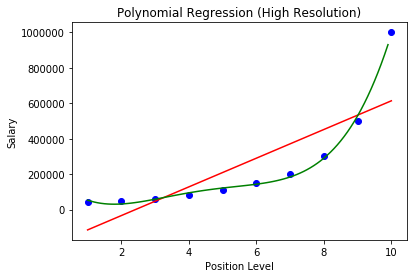

In [41]:
# We need more X points to get a smoother lin_reg2 curve so we make a grid
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg1.predict(X),color='red')

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,lin_reg2.predict(poly_features.fit_transform(X_grid)),color = 'green')

plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression (High Resolution)')

In [9]:
# Predicting the salary of position 6.6
# a) with linear regression:
print(lin_reg1.predict([[6.5]]))

# b) with polinomial linear regression
print(lin_reg2.predict(poly_features.fit_transform([[6.5]])))

[330378.78787879]
[158862.45265153]


## <a id=5> 5. Support Vector Regression

[170370.0204065]


C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\

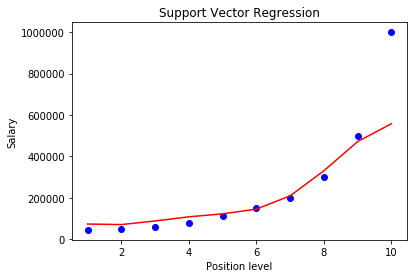

In [42]:
# 1) Import the dataset:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

# 2) Feature scaling ( A MUST !!)
# Unlike in the linear regression model, we have to apply feature scaling here because
# we don't have the coefficients that will adjust our features.

# y has to be a 2D array cuz that's what the StandardScaler class expects
y = y.reshape(len(y),1)

sc1 = StandardScaler()
sc2 = StandardScaler()
X = sc1.fit_transform(X)
y = sc2.fit_transform(y)

# 3) Training the SVR model on the whole dataset
# most used kernel is 'rbf' kernel, it's the default.
# the SVR works both for linears and nonlinears model cuz the kernel can be both
regressor = SVR()
regressor.fit(X,y)

# 4) Visualising the results
plt.scatter(sc1.inverse_transform(X),sc2.inverse_transform(y),color='blue')
plt.plot(sc1.inverse_transform(X),sc2.inverse_transform(regressor.predict(X)),color='red')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Support Vector Regression')

# we notice that if there is a point far from the other points (outliers), the SVR method doesn't properly predict it

# 5) Predicting a new result
# the input of the predict method should be a sc1 scaled array like X
# the results will be according to the new scale of y, we have to return them to their original scale
print(sc2.inverse_transform(regressor.predict(sc1.transform([[6.5]]))))

In [28]:
dir(sc1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_param_names',
 '_reset',
 'copy',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'mean_',
 'n_samples_seen_',
 'partial_fit',
 'scale_',
 'set_params',
 'transform',
 'var_',
 'with_mean',
 'with_std']

## <a id=6> 6. Decision Tree Regression

[150000.]


Text(0.5, 1.0, 'Decision Tree Regression')

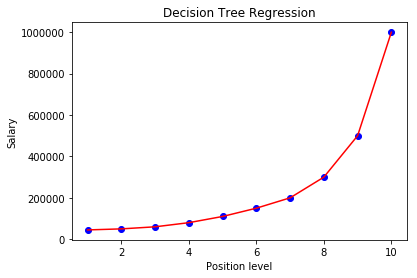

In [43]:
# The decision Tree model is not adapted to small datasets with just one features
# but this code will work for other datasets

# 1) Import the dataset:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

# NO Feature scaling cuz the results of decision tree regression result from splitting the data and not from equations like previously
# Encoding categorical data has to be done when necessary

# 2) Training the Decision Tree model
# we don't need to tune the parameters, only need to fix the seed to get the same results as smexy
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

# 3) Predicting a new result
print(regressor.predict([[6.5]]))

# 4) Visualising the results
plt.scatter(X,y,color='blue')
plt.plot(X,regressor.predict(X),color='red')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Decision Tree Regression')

Text(0.5, 1.0, 'Decision Tree Regression (High Resolution)')

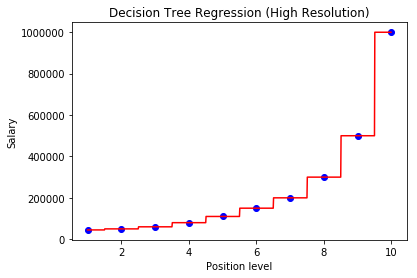

In [51]:
# Decision Tree regression results have to be visualised in high resolution
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color='blue')
plt.plot(X_grid,regressor.predict(X_grid),color='red')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Decision Tree Regression (High Resolution)')

## <a id=7> 7. Random Forest Regression

[167000.]


Text(0.5, 1.0, 'Random Forest Regression (High Resolution)')

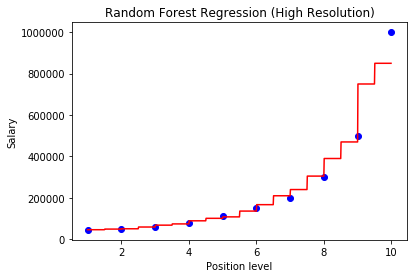

In [2]:
# 1) Import the dataset:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

# NO Feature scaling cuz the results of random forest regression result from splitting the data and not from equations like previously
# Encoding categorical data has to be done when necessary

# 2) Training the Decision Tree model
# here we need to decide the "number of trees" parameter, it's recommended to start with 10 trees
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X,y)

# 3) Predicting a new result
print(regressor.predict([[6.5]]))

# 4) Visualising the results in high resolution
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color='blue')
plt.plot(X_grid,regressor.predict(X_grid),color='red')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Random Forest Regression (High Resolution)')

## <a id=8> 8. Regularization Models

<a href="https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer">https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer</a>
    
Ridge regression and lasso regression are two different techniques for increasing the robustness against colinearity of ordinary least squares regression. Both of these algorithms attempt to minimize a cost function. The cost is a function of two terms: one, the residual sum of squares (RSS), taken from ordinary least squares; the other, an additional regularizer penalty. The second term is an L2 norm in ridge regression, and an L1 norm in lasso regression.
    
- L1: absolute value
- L2: Squared value (euclidean distance squared)
    
<a href="https://www.kaggle.com/code/residentmario/l1-norms-versus-l2-norms/notebook">https://www.kaggle.com/code/residentmario/l1-norms-versus-l2-norms/notebook</a>

In [2]:
from sklearn.linear_model import Ridge, ElasticNet, Lasso

### 8.1 Ridge Regression (L2 norm regularization)
Why is it part of regularization?
- If we have few data points, LinearRegression can result in overfitting (Just imagine you have 2 points, the linear regression best fit line will be the line passing from the 2 points) ==> Small Bias but High Variance
- Ridge Regression, introduces a small amount of Bias into how the line is fit to the data ==> High Bias but Small Variance
- LinearRegression minimizes the <b>sum of squared residuals</b> In contrast RidgeRegression minimizes <b>sum of squared residuals +  λ x slope**2</b>
- λ can be from 0 to infinity, if  λ=0 we get the same line as LinearRegression
- The bigger λ is, the smaller is the slope of our fit line ==> λ shrinks the slope


### 8.2 Lasso Regression (L1 norm regularization)
- Lassoregression minimizes <b> sum of squared residuals +  λ x |slope|
    
#### Lasso and Ridge difference:
- Ridge Regression can shrink the slope (aka feature weights) asymptotically close to 0, while Lasso regression can shrink the slope all the way to 0
- Because of the above, Lasso regression can exclude useless variables from equations. Hence, when using a big λ it's a little better than ridge regression at reducing the Variance (overfitting) in models that contain a lot of useless variables
- In contrast, Ridge Regresison tends to do a little better when most models are useful.
    
<b>To summarize:</b>
- Big training set ==> Linear Regression
- Small training set:  
    > - All features are important ==> Ridge Regression
    > - Few features should be important ==> Lasso Regression
    
    
### 8.3 Elastic Net Regression (L1 + L2 norm regularization)
- When we have tons of feature, which we don't know in advance if they'll be useful or not
- Minimizes <b>sum of squared residuals +  λ1 x slope**2 + λ2 x |slope|</b>
- To find the best values, we use Cross Validation on different values of  λ1 and λ2
- Especially good at dealing with situations where there is a <b>high correlation</b> between parameters: Lasso tends to pick one of the correlated terms and eliminate the others, Ridge Regression tends to shrink the weights for the correlated terms all together

### <a id=9> 9. Stochastic Gradient Descent </a>
- Faster than Gradient Descent. Uses mini-batches of data (randomly, hence stochastic) instead of the entire data to update the weights reducing the number of calculations
- Used when the number of samples & features is very large

In [2]:
from sklearn.linear_model import SGDRegressor